Preprocessing data:

In [1]:
record1 = "databases/record1.csv"
record2 = "databases/record2.csv"

**DIRECTORY OF DICTIONARY**

*After the following code, list_directory (which gives the directory of what each index in the list in the values of the dictionary) contains:*
['ID NUMBER', 'OFFENSE ARREST DESC', 'OFFENSE ATTEMPT DESC', 'COUNTY COMMITTED', 'DATE OF BIRTH', 'RACE DESC', 'GENDER', 'FACILITY', 'CURRENT SENTENCE PARDONED OR COMMUTED DATE', 'SENTENCE BEGIN DATE', 'MIN TERM/YEAR', 'MIN MONTH', 'MIN DAY', 'MAX TERM/YEAR', 'MAX MONTH', 'MAX DAY', 'PAROLE ELIGIBILITY DATE', 'EARLIEST POSSIBLE RELEASE DATE', 'INST RELEASE DATE', 'INST RELEASE TYPE', 'PAROLE BOARD NEXT REVIEW DATE(MONTH&YEAR)', 'PAROLE BOARD FINAL HEARING DATE(MONTH&YEAR)', 'PAROLE BOARD STATUS', 'PAROLE DATE', 'PAROLE DISCHARGE DESC', 'SENTENCE LENGTH']

*Removed from record 2:*
OFFENSE MINIMUM YEAR OR TERM;
MINIMUM MONTH;
MINIMUM DAY;
OFFENSE MAXIMUM YEAR OR TERM;
MAXIMUM MONTH;
MAXIMUM DAY;
FELONY MSDMNR CODE;
OFFENSE TYPE CODE;
HABITUAL CRIME;
OFFENSE RUN CODE;

*Removed from record 1:*
COMMITTED LAST NAME;
FIRST NAME;
MIDDLE NAME;
NAME EXTENSION;
LEGAL LAST NAME;
FIRST NAME;
MIDDLE NAME;
NAME EXTENSION;
GUN CLAUSE;
GOOD TIME LAW;

**INDEX**

*From record 2*

'ID NUMBER' = 0

'OFFENSE ARREST DESC' = 1

'OFFENSE ATTEMPT DESC' = 2

'COUNTY COMMITTED' = 3


*From record 1*

'DATE OF BIRTH' = 4 **changed to year**

'RACE DESC' = 5

'GENDER' = 6

'FACILITY' = 7

'CURRENT SENTENCE PARDONED OR COMMUTED DATE' = 8 **changed to year**

'SENTENCE BEGIN DATE' = 9 **changed to year**

'MIN TERM/YEAR' = 10

'MIN MONTH' = 11

'MIN DAY' = 12

'MAX TERM/YEAR' = 13

'MAX MONTH' = 14

'MAX DAY' = 15

'PAROLE ELIGIBILITY DATE' = 16 **changed to year**

'EARLIEST POSSIBLE RELEASE DATE' = 17 **changed to year**

'INST RELEASE DATE' = 18 **changed to year**

'INST RELEASE TYPE' = 19

'PAROLE BOARD NEXT REVIEW DATE(MONTH&YEAR)' = 20

'PAROLE BOARD FINAL HEARING DATE(MONTH&YEAR)' = 21

'PAROLE BOARD STATUS' = 22

'PAROLE DATE' = 23 **changed to year**

'PAROLE DISCHARGE DESC' = 24

*Our additions:*

'SENTENCE LENGTH' = 25

*sentence length dictionary*: key is crime string, value is 2 lists: list 0 is white, list 1 is non-white


**Record 2:**

In [109]:
master_dict = {}
list_directory = []
file_record2 = open(record2, "r")
counter = 0
for line in file_record2:
    # split by comma
    line = line.split(",")
    if len(line) == 14:
        if counter == 0:
            # strip \ufeff and \n
            line[0] = line[0][1:]
            line[-1] = line[-1][0:-1]
            # removes indexes we don't need
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(2)
            line.pop(2)
            line.pop(3)
            line.pop(3)
            list_directory = line
        else:
            line[-1] = line[-1][0:-1]
            # removes indexes we don't need
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(1)
            line.pop(2)
            line.pop(2)
            line.pop(3)
            line.pop(3)
            # strips leading and ending whitespace:
            for item in range(len(line)):
                line[item] = line[item].strip()
            # add to master dict if not in already
            if line[0] not in master_dict:
                master_dict[line[0]] = line
            # if it is in already, remove the id from dict as it is a multiple offender or duplicate
            else:
                del master_dict[line[0]]
    counter += 1

**Record 1:**

In [110]:
file_record1 = open(record1, "r")
counter = 0
for line in file_record1:
    save_beginmonth = "" # in case sentence begin year = sentence end year, we need the months
    save_endmonth = ""
    line = line.split(",")
    if len(line) == 32:
        if counter == 0:
            # remove all unneeded, then remove \n
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(0)
            line.pop(5)
            line.pop(14)
            line[-1] = line[-1][0:-1]
            list_directory = list_directory + line
            list_directory.append("SENTENCE LENGTH")
        else:
            #print(counter)
            line[-1] = line[-1][0:-1]

            for item in range(len(line)):
                line[item] = line[item].strip()

            # we only want the ones in the dictionary (first offenders)
            if line[0] in master_dict:
                # remove unneeded indexes, save id
                id_ = line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(0)
                line.pop(5)
                line.pop(14)

                # see if person has earliest possible release date (13) and sentence begin date (5)
                if line[13] == '' or line[5] == '' or line[13] == ' ' or line[5] == ' ':
                    # remove from dictionary if they don't
                    del master_dict[id_]

                else:
                    # change DOB to year
                    if line[0] != '':
                        line[0] = line[0][-4:]
                    # change sentence pardoned to year
                    if line[4] != '':
                        line[4] = line[4][-4:]
                    # change sentence begin date to year
                    if line[5] != '':
                        for i in range(len(line[5])):
                            if line[5][i] != "/":
                                save_beginmonth += line[5][i]
                            else:
                                break
                        line[5] = line[5][-4:]
                    # change parol eligibility date to year
                    if line[12] != '':
                        line[12] = line[12][-4:]
                    # change earliest possible release date to year
                    if line[13] != '':
                        for i in range(len(line[13])):
                            if line[13][i] != "/":
                                save_endmonth += line[13][i]
                            else:
                                break
                        line[13] = line[13][-4:]
                        #print(line[13])
                    # change inst release date to year
                    if line[14] != '':
                        line[14] = line[14][-4:]
                    # changed parole date to year
                    if line[19] != '' and line[19][0:7] != "PAROLED":
                        line[19] = line[19][-4:]

                    # add sentence length
                    if line[13] == 'LFE' or line[13] == 'DTH':
                        line.append(line[13])
                    elif line[5] == 'EARM':
                        line.append(line[5])
                    else:
                        sent_length = int(line[13]) - int(line[5])
                        if sent_length == 0:
                            sent_length = ((int(save_endmonth) - int(save_beginmonth)) + 1) / 12
                        
                        line.append(str(sent_length))

                    master_dict[id_] = master_dict[id_] + line

    else:
        if line[0] in master_dict:
            del master_dict[line[0]]         
    counter += 1

In [115]:
# for pie charts
black_count = 0
white_count = 0
hisp_count = 0
other_count = 0

all_w_lengths = []
all_b_lengths = []
all_h_lengths = []

# for when robbery, burglary, theft occured
robbery_begin = []
burglary_begin = []
theft_begin = []
sentence_dict = {}

for key in master_dict.keys():
    # where we put sentence length into correct dictionaries
    new_key = ""
    crime = master_dict[key][1]
    
    # for hist of when robbery, burglary, theft occured
    if crime == "ROBBERY":
        robbery_begin.append(master_dict[key][9])
    if crime == "BURGLARY":
        burglary_begin.append(master_dict[key][9])
    if crime == "THEFT":
        theft_begin.append(master_dict[key][9])
       
    sentence = master_dict[key][-1]
    race = master_dict[key][5]
    if race == "BLACK":
        black_count += 1
        all_b_lengths.append(sentence)
    elif race == "WHITE":
        white_count += 1
        all_w_lengths.append(sentence)
    elif race == "HISPANIC":
        hisp_count += 1
        all_h_lengths.append(sentence)
    else:
        other_count += 1
        race = "OTHER"
    
    
    new_key = crime + " - " + race
    
    if new_key not in sentence_dict:
        sentence_dict[new_key] = []
        sentence_dict[new_key].append(sentence)
    else:
        sentence_dict[new_key].append(sentence)

LFE and DTH get changed to 122, the longest possible human life span

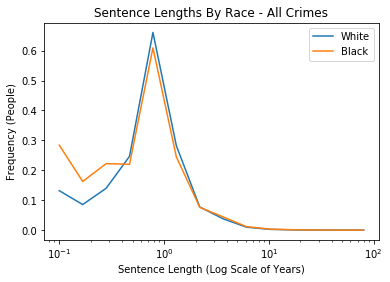

In [116]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
for i in range(len(all_w_lengths)):
    if all_w_lengths[i] == "LFE" or all_w_lengths[i] == "DTH":
        all_w_lengths[i] = 122
    #print(all_w_lengths[i])
    all_w_lengths[i] = float(all_w_lengths[i])
    if all_w_lengths[i] < 0:
        all_w_lengths[i] = 0
for i in range(len(all_b_lengths)):
    if all_b_lengths[i] == "LFE" or all_b_lengths[i] == "DTH":
        all_b_lengths[i] = 122
    all_b_lengths[i] = float(all_b_lengths[i])
    if all_b_lengths[i] < 0:
        all_b_lengths[i] = 0
for i in range(len(all_h_lengths)):
    if all_h_lengths[i] == "LFE" or all_h_lengths[i] == "DTH":
        all_h_lengths[i] = 122
    all_h_lengths[i] = float(all_h_lengths[i])
    if all_h_lengths[i] < 0:
        all_h_lengths[i] = 0

bins = np.logspace(np.log10(0.1) , np.log10(max(all_w_lengths)), 15)
wbin_heights, wbin_x = np.histogram(all_w_lengths, bins, density=True)
bbin_heights, bbin_x =  np.histogram(all_b_lengths, bins, density=True)
#hbin_heights, hbin_x = np.histogram(all_h_lengths, bins, density=True)
wbin_x = wbin_x[:-1]
bbin_x = bbin_x[:-1]
#hbin_x = hbin_x[:-1]
plt.plot(wbin_x, wbin_heights, label = "White")
plt.plot(bbin_x, bbin_heights, label = "Black")
#plt.plot(hbin_x, hbin_heights, label = "Hispanic")
plt.xscale('log')
#plt.yscale('log')
plt.legend(loc='upper right')
plt.title("Sentence Lengths By Race - All Crimes")
plt.xlabel("Sentence Length (Log Scale of Years)")
plt.ylabel("Frequency (People)")
plt.show()

